#Cement Dust Emissions Optimization


   temp   dp  residue  gas_flow  avg_dust
0    52  1.0        9    103717     55.08
1    57  0.9       11    128341     52.79
2    53  1.0        6    107198     52.50
3    53  1.9       15     93205     52.20
4    52  1.1       14    103356     51.36
            temp         dp    residue       gas_flow   avg_dust
count  53.000000  53.000000  53.000000      53.000000  53.000000
mean   53.830189   2.477358  10.283019  108036.811321  22.925283
std     3.998730   1.081424   2.796821   17214.902469  19.398917
min    43.000000   0.900000   5.000000   53717.000000   1.250000
25%    52.000000   1.600000   8.000000   99237.000000   5.900000
50%    54.000000   2.200000  10.000000  107198.000000  13.080000
75%    57.000000   3.500000  12.000000  124102.000000  44.500000
max    59.000000   4.400000  16.000000  134082.000000  55.080000


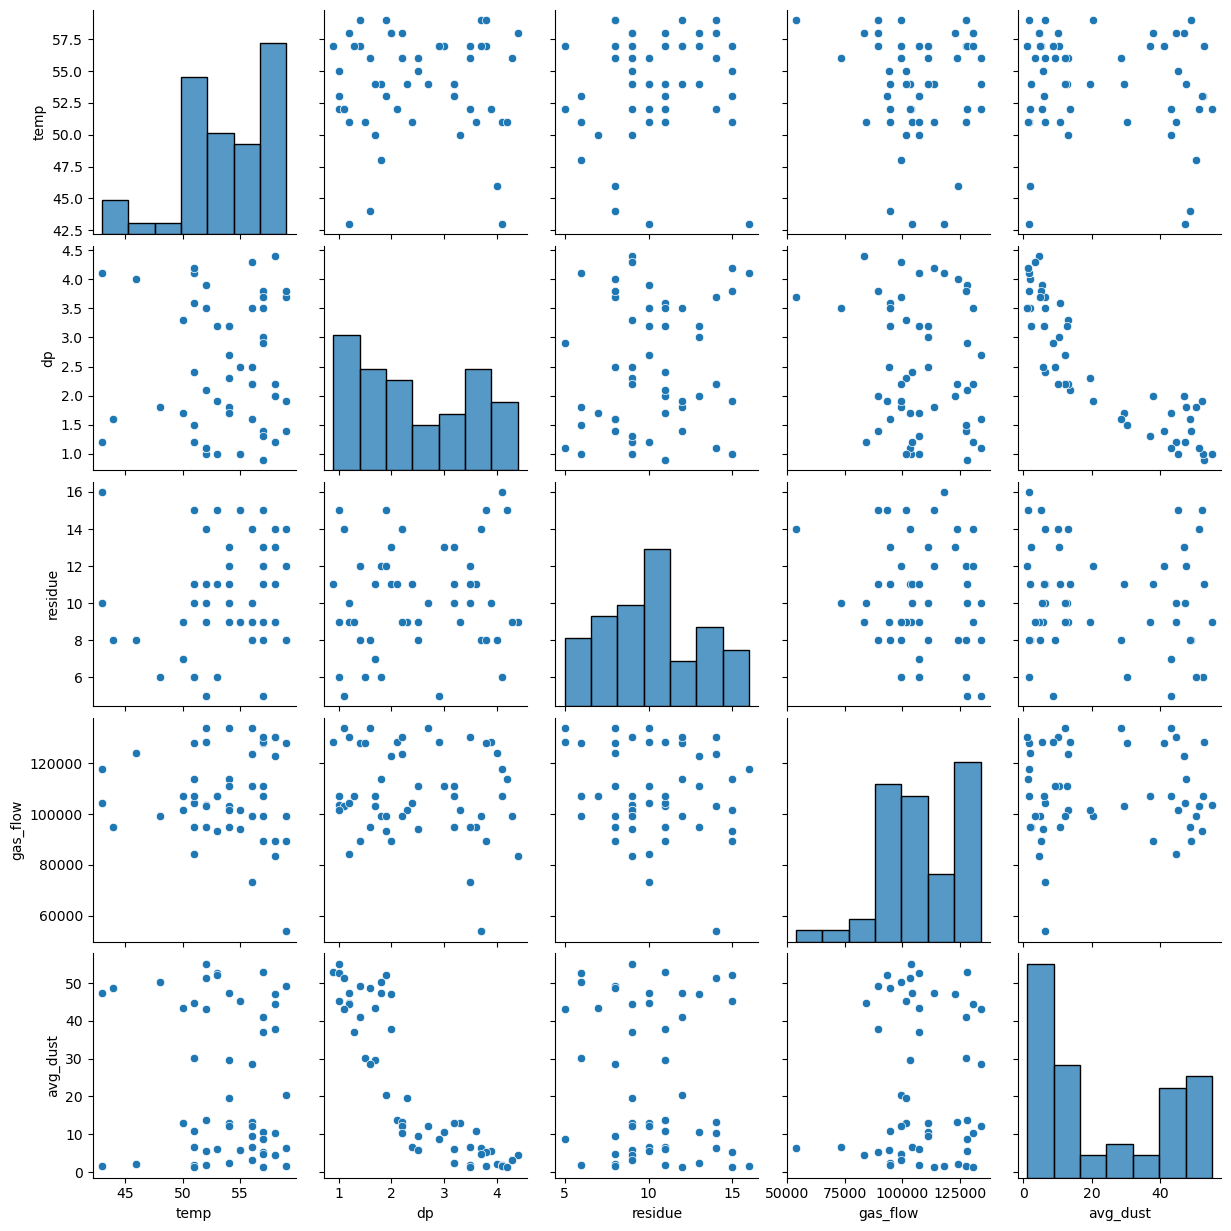

          avg_dust      temp        dp   residue  gas_flow
avg_dust  1.000000 -0.112243 -0.878406 -0.121030  0.025967
temp     -0.112243  1.000000  0.006654  0.107552 -0.030570
dp       -0.878406  0.006654  1.000000  0.136954 -0.165955
residue  -0.121030  0.107552  0.136954  1.000000 -0.151484
gas_flow  0.025967 -0.030570 -0.165955 -0.151484  1.000000


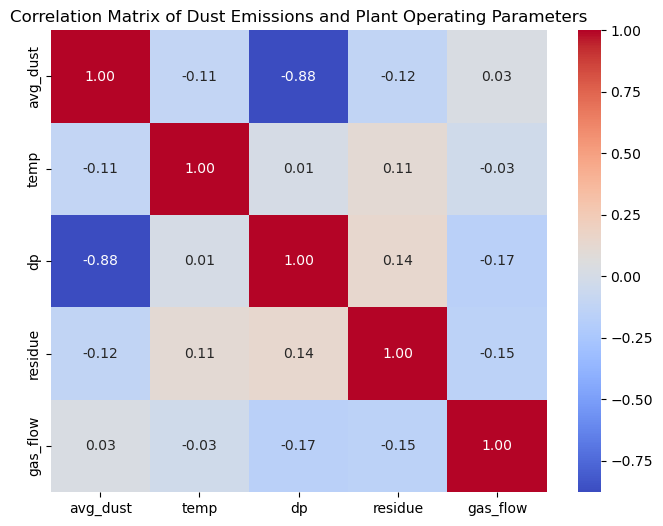

R^2 Score: 0.739924395552902
RMSE: 10.242611982602057


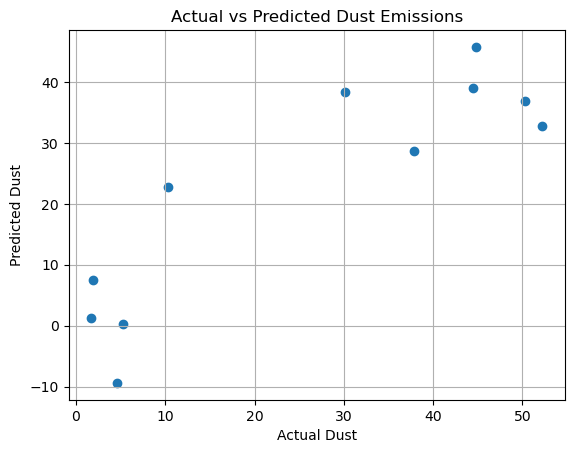

In [3]:
# First, I visualized the multivariate correlation between dust emissions and all other plant operating parameters
# Then I built, trained and evaluated a regression model to use in my analysis

#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Loading the Dataset
df = pd.read_csv("/Users/Nobesuthu Ngwenya/Desktop/DATA portfolio project/Cement_Plant_Dust_Summary_Export.csv")

# Data Exploration
print(df.head())
print(df.describe())
sns.pairplot(df)
plt.show()

# Checking the correlation between dust emissions and all other parameters
## calculating the correlation matrix
correlation_matrix = df[['avg_dust','temp', 'dp', 'residue',  'gas_flow']].corr()
print(correlation_matrix)

## Creating a heat map to visualize the correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt=".2f")
plt.title("Correlation Matrix of Dust Emissions and Plant Operating Parameters")
plt.show()

# Preparing Features and Target
X = df[['temp', 'dp', 'residue', 'gas_flow']]
y = df['avg_dust']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Model
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction and Evaluation
y_pred = model.predict(X_test)
print("R^2 Score:", r2_score(y_test, y_pred))
# Fixed: Calculate RMSE manually by taking the square root of MSE
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Plotting Predictions vs Actual
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Dust")
plt.ylabel("Predicted Dust")
plt.title("Actual vs Predicted Dust Emissions")
plt.grid(True)
plt.show()



Model Equation: avg_dust = -15.7571 * dp + 61.9613
🔧 Optimal DP: 4.40 mbar
🌫️ Predicted Minimum Dust Emission: -7.37 mg/m³


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


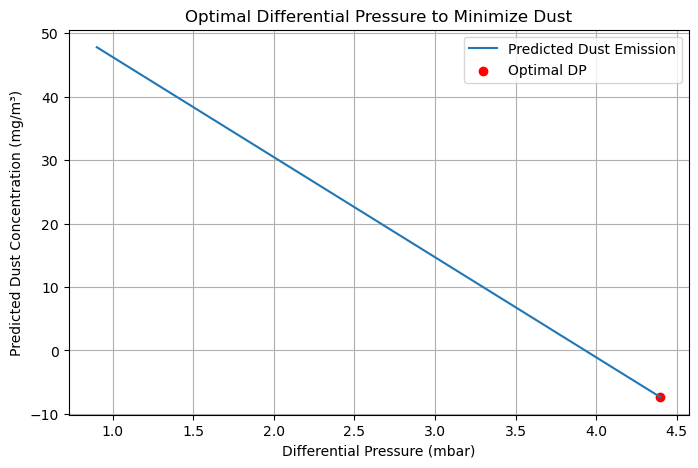

In [5]:
# Next, I used my regression model to find the range of dp values that minimizes dust emissions

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# df is the cleaned dataset
# Features: ['temp', 'residue', 'dp', 'gas_flow']
# Target: 'avg_dust'

# Selecting features and target
X = df[['dp']] 
y = df['avg_dust']

# Training regression model
model = LinearRegression()
model.fit(X, y)

# Coefficients and intercept
print(f"Model Equation: avg_dust = {model.coef_[0]:.4f} * dp + {model.intercept_:.4f}")

# Simulating a range of dp values
dp_range = np.linspace(df['dp'].min(), 
                       df['dp'].max(), 100).reshape(-1, 1)

# Predicting dust for each dp value
predicted_dust = model.predict(dp_range)

# Finding the dp with the lowest predicted dust
optimal_index = np.argmin(predicted_dust)
optimal_dp = dp_range[optimal_index][0]
min_dust = predicted_dust[optimal_index]

print(f"🔧 Optimal DP: {optimal_dp:.2f} mbar")
print(f"🌫️ Predicted Minimum Dust Emission: {min_dust:.2f} mg/m³")

# Plotting the results
plt.figure(figsize=(8, 5))
plt.plot(dp_range, predicted_dust, label='Predicted Dust Emission')
plt.scatter([optimal_dp], [min_dust], color='red', label='Optimal DP')
plt.xlabel('Differential Pressure (mbar)')
plt.ylabel('Predicted Dust Concentration (mg/m³)')
plt.title('Optimal Differential Pressure to Minimize Dust')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Finally, I built a simple recommendation tool that takes in operating parameters, predicts dust emissions, and gives a friendly recommendation

def recommend_dust_control(temp, residue, dp, gas_flow):
    import numpy as np

    # Preparing input as array
    input_data = np.array([[temp, residue, dp, gas_flow]])

    # Predicting dust emissions
    predicted_dust = model.predict(input_data)[0]

    # Printing results
    print(f"\n📊 Predicted Dust Emissions: {predicted_dust:.2f} mg/m³")

    # Recommendation logic
    if predicted_dust > 50:
        print("⚠️ High dust levels detected. Consider increasing differential pressure or performing baghouse maintenance.")
        
    elif predicted_dust <= 15:
        print("✅ Dust levels are within optimal range. Maintain current settings.")
        
    else:
        print("🔧 Moderate dust levels. Fine-tuning parameters like residue % or temperature may help.")
        
    return predicted_dust
